# Exercicio 2 de Machine Learning proposto pela Faculdade da Fiap

### Desafio seria coletar dois dataset a escolha do aluno, referentes a municipios brasileiros, com o intuito de calcular a Classificação da CAPAG (Capacidade de Pagamento de Municípios) do Municipio.

## Imports

In [1]:
#!conda install -c anaconda py-xgboost
#!pip install autokeras

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# Análise Descritiva

## < Dataframe 1 >
### Capacidade de Pagamento de Municípios (CAPAG)
> Este conjunto de dados contém as notas de capacidade de pagamento (CAPAG) de todos os municípios, além das notas obtidas por eles em cada um dos três indicadores avaliados.

In [7]:
# Leitura dos dados CAPAG e criação da coluna 'MUNICIPIO'
df_capag = pd.read_csv('CAPAG-Municipios.csv', delimiter = ';')
lista_municipio = []
for i in df_capag['Instituição']:
    lista_municipio.append(str(i)[24:-5])
df_capag['MUNICIPIO'] = lista_municipio
print(df_capag.shape)
df_capag.head()

(5569, 12)


,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação da CAPAG,MUNICIPIO
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,8583.0,"0,127976496",A,"0,906314496",B,"0,962423688",A,B,Abadia de Goiás
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,6972.0,"0,165696027",A,"0,90987563",B,"0,774738727",A,B,Abadia dos Dourados
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,19614.0,"0,154622885",A,"0,959243401",C,"1,832419324",C,C,Abadiânia
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23223.0,"0,310158289",A,"0,901489297",B,"0,13432183",A,B,Abaeté
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,156292.0,"0,031986086",A,"0,961195332",C,"0,882159646",A,C,Abaetetuba


In [8]:
df_capag = df_capag[df_capag['Classificação da CAPAG'] != 'n.d.']
df_capag.head()

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação da CAPAG,MUNICIPIO
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,8583.0,"0,127976496",A,"0,906314496",B,"0,962423688",A,B,Abadia de Goiás
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,6972.0,"0,165696027",A,"0,90987563",B,"0,774738727",A,B,Abadia dos Dourados
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,19614.0,"0,154622885",A,"0,959243401",C,"1,832419324",C,C,Abadiânia
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23223.0,"0,310158289",A,"0,901489297",B,"0,13432183",A,B,Abaeté
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,156292.0,"0,031986086",A,"0,961195332",C,"0,882159646",A,C,Abaetetuba


In [9]:
df_capag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 5566
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Instituição             3974 non-null   object 
 1   Cod.IBGE                3974 non-null   int64  
 2   UF                      3974 non-null   object 
 3   População               3974 non-null   float64
 4   Indicador_1             3974 non-null   object 
 5   Nota_1                  3974 non-null   object 
 6   Indicador_2             3974 non-null   object 
 7   Nota_2                  3974 non-null   object 
 8   Indicador_3             3974 non-null   object 
 9   Nota_3                  3974 non-null   object 
 10  Classificação da CAPAG  3974 non-null   object 
 11  MUNICIPIO               3974 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 403.6+ KB


In [10]:
df_capag.describe(include = 'all')

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação da CAPAG,MUNICIPIO
count,3974,3.974000e+03,3974,3.974000e+03,3974,3974,3974,3974,3974,3974,3974,3974
unique,3974,NaN,26,NaN,3974,3,3972,3,3968,2,4,3838
top,Prefeitura Municipal de Ipeúna - SP,NaN,MG,NaN,"0,037504416",A,#NÚM!,C,1,A,C,São Domingos
freq,1,NaN,663,NaN,1,3709,3,1679,6,2272,2402,4
mean,NaN,3.340702e+06,NaN,4.418903e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.431646e+05,NaN,2.546367e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.100023e+06,NaN,1.088000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.702318e+06,NaN,5.839750e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.163052e+06,NaN,1.243250e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.122194e+06,NaN,2.797225e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(pd.isnull(df_capag).sum())

Instituição               0
Cod.IBGE                  0
UF                        0
População                 0
Indicador_1               0
Nota_1                    0
Indicador_2               0
Nota_2                    0
Indicador_3               0
Nota_3                    0
Classificação da CAPAG    0
MUNICIPIO                 0
dtype: int64


## < Dataframe 2 > 
### Categorização dos Municípios Turísticos
   >  Categorização é um instrumento elaborado pelo Ministério do Turismo para identificar o desempenho da economia do setor nos municípios que constam no Mapa do Turismo Brasileiro. Devido à quantidade de municípios inseridos nas 291 regiões turísticas do Mapa do Turismo Brasileiro (2.175), foram utilizados dados que pudessem ser atualizados periodicamente e que traduzissem a economia do turismo. A partir daí se chegou a quatro variáveis que foram cruzadas em uma análise de cluster e deram origem a cinco categorias de municípios (A, B, C, D e E).

In [3]:
# Leitura dos dados Categorização
df_categ = pd.read_excel('RELATORIO_CATEGORIZACAO_2019-Portal.xls')
print(df_categ.shape)
df_categ.head()

(2694, 11)


,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
0,Centro-Oeste,MT,Região Turística Portal do Agronegócio,Nova Mutum,5106224,89,14,0,15309,708887,C
1,Nordeste,MA,Polo Lagos e Campos Floridos,Cajapió,2102408,0,0,0,1376,0,D
2,Sudeste,MG,Caminhos da Mantiqueira,Brazópolis,3108909,6,3,0,25587,0,D
3,Sudeste,MG,Ouro,Caeté,3110004,310,11,0,23757,4944942,B
4,Sudeste,MG,Pedras Preciosas,Catuji,3115458,0,0,149,0,0,D


In [4]:
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   MACRO                                        2694 non-null   object
 1   UF                                           2694 non-null   object
 2   REGIAO_TURISTICA                             2694 non-null   object
 3   MUNICIPIO                                    2694 non-null   object
 4   COD_IBGE                                     2694 non-null   int64 
 5   QUANTIDADE_EMPREGOS                          2694 non-null   int64 
 6   QUANTIDADE_ ESTABELECIMENTOS                 2694 non-null   int64 
 7   QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL  2694 non-null   int64 
 8   QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL       2694 non-null   int64 
 9   ARRECADACAO                                  2694 non-null   int64 
 10  CLUSTER     

In [5]:
df_categ.describe()

,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO
count,2.694000e+03,2694.000000,2694.000000,2.694000e+03,2.694000e+03,2.694000e+03
mean,3.405169e+06,93.380475,7.516333,3.850519e+03,6.383554e+04,1.238121e+06
std,9.310852e+05,555.239839,26.203060,4.667117e+04,3.930170e+05,1.310179e+07
min,1.100015e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.905852e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.302650e+06,6.000000,2.000000,3.800000e+01,5.376500e+03,0.000000e+00
75%,4.205982e+06,35.000000,6.000000,3.730000e+02,2.789175e+04,0.000000e+00
max,5.300108e+06,17946.000000,785.000000,1.651696e+06,1.347863e+07,4.733092e+08


In [6]:
print(pd.isnull(df_categ).sum())

MACRO                                          0
UF                                             0
REGIAO_TURISTICA                               0
MUNICIPIO                                      0
COD_IBGE                                       0
QUANTIDADE_EMPREGOS                            0
QUANTIDADE_ ESTABELECIMENTOS                   0
QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL    0
QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL         0
ARRECADACAO                                    0
CLUSTER                                        0
dtype: int64


# Integrando os Dataframes

In [12]:
df = pd.merge(df_capag,df_categ,on=['MUNICIPIO','UF'],how='left')
print(df.shape)
df.head(5)

(3974, 21)


,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,...,MUNICIPIO,MACRO,REGIAO_TURISTICA,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,8583.0,"0,127976496",A,"0,906314496",B,"0,962423688",A,...,Abadia de Goiás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,6972.0,"0,165696027",A,"0,90987563",B,"0,774738727",A,...,Abadia dos Dourados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,19614.0,"0,154622885",A,"0,959243401",C,"1,832419324",C,...,Abadiânia,Centro-Oeste,Região Turística do Ouro e Cristais,5200100.0,157.0,31.0,6752.0,89930.0,741632.0,B
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23223.0,"0,310158289",A,"0,901489297",B,"0,13432183",A,...,Abaeté,Sudeste,Lago de Três Marias,3100203.0,16.0,3.0,245.0,8415.0,0.0,D
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,156292.0,"0,031986086",A,"0,961195332",C,"0,882159646",A,...,Abaetetuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Instituição                                  3974 non-null   object 
 1   Cod.IBGE                                     3974 non-null   int64  
 2   UF                                           3974 non-null   object 
 3   População                                    3974 non-null   float64
 4   Indicador_1                                  3974 non-null   object 
 5   Nota_1                                       3974 non-null   object 
 6   Indicador_2                                  3974 non-null   object 
 7   Nota_2                                       3974 non-null   object 
 8   Indicador_3                                  3974 non-null   object 
 9   Nota_3                                       3974 non-null   object 
 10  

In [14]:
df.describe()

,Cod.IBGE,População,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO
count,3.974000e+03,3.974000e+03,2.037000e+03,2037.000000,2037.000000,2.037000e+03,2.037000e+03,2.037000e+03
mean,3.340702e+06,4.418903e+04,3.461066e+06,110.350515,8.519391,4.749243e+03,7.546038e+04,1.512638e+06
std,9.431646e+05,2.546367e+05,8.775250e+05,626.894101,28.689076,5.310837e+04,4.393835e+05,1.496106e+07
min,1.100023e+06,1.088000e+03,1.100023e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.702318e+06,5.839750e+03,2.930774e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.163052e+06,1.243250e+04,3.502903e+06,8.000000,2.000000,8.000000e+01,7.240000e+03,0.000000e+00
75%,4.122194e+06,2.797225e+04,4.205456e+06,44.000000,6.000000,4.990000e+02,3.193000e+04,0.000000e+00
max,5.222302e+06,1.217687e+07,5.222302e+06,17946.000000,785.000000,1.651696e+06,1.347863e+07,4.733092e+08


In [15]:
print(pd.isnull(df).sum())

Instituição                                       0
Cod.IBGE                                          0
UF                                                0
População                                         0
Indicador_1                                       0
Nota_1                                            0
Indicador_2                                       0
Nota_2                                            0
Indicador_3                                       0
Nota_3                                            0
Classificação da CAPAG                            0
MUNICIPIO                                         0
MACRO                                          1937
REGIAO_TURISTICA                               1937
COD_IBGE                                       1937
QUANTIDADE_EMPREGOS                            1937
QUANTIDADE_ ESTABELECIMENTOS                   1937
QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL    1937
QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL         1937
ARRECADACAO 

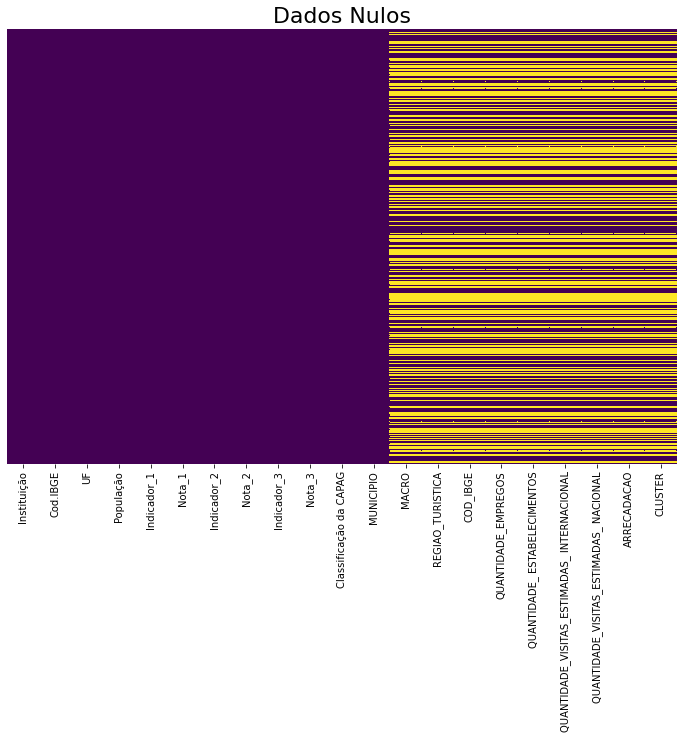

In [16]:
# Visualizando onde há Valores NaN
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Dados Nulos',size = 22)
plt.show()

# Análise Diagnóstica

<AxesSubplot:>

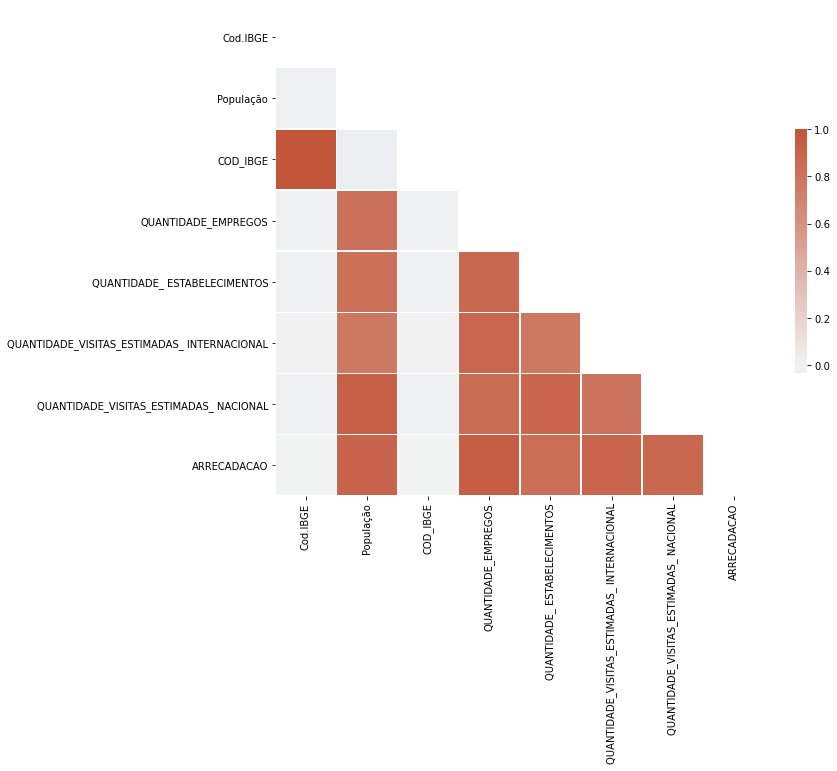

In [17]:
# Gráfico de correlação entre os primeiros 50 tipos celulares
corr_celular = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5})

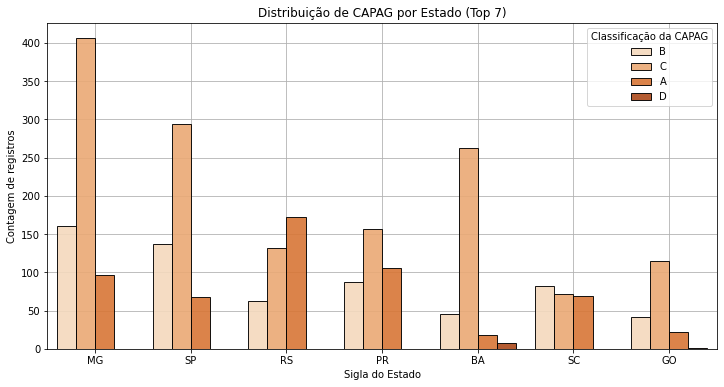

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='UF', hue = 'Classificação da CAPAG',data = df, palette='Oranges', order=pd.value_counts(df['UF']).iloc[:7].index, edgecolor="black",linewidth = 1, zorder = 3, alpha = 0.9 )
plt.grid(True, zorder = 0)
plt.title("Distribuição de CAPAG por Estado (Top 7)")
plt.xlabel('Sigla do Estado')
plt.ylabel('Contagem de registros')
plt.show()

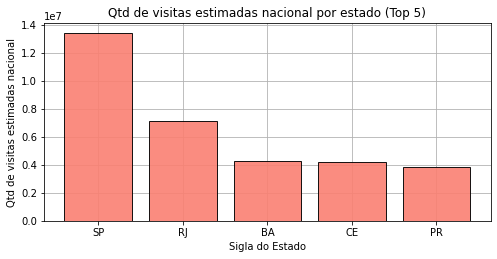

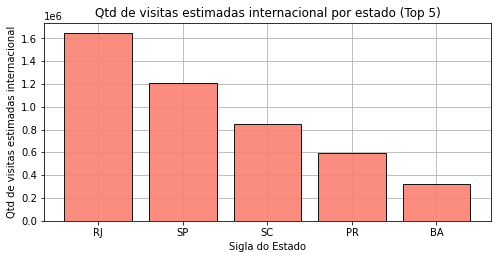

In [19]:
df_sorted_desc= df.sort_values('QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL',ascending=False)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2) 
plt.bar('UF', 'QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL',data=df_sorted_desc.iloc[:5], edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Qtd de visitas estimadas nacional por estado (Top 5)")
plt.xlabel('Sigla do Estado')
plt.ylabel('Qtd de visitas estimadas nacional')
plt.show()

df_sorted_desc= df.sort_values('QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL',ascending=False)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2) 
plt.bar('UF', 'QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL',data=df_sorted_desc.iloc[:5], edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Qtd de visitas estimadas internacional por estado (Top 5)")
plt.xlabel('Sigla do Estado')
plt.ylabel('Qtd de visitas estimadas internacional')
plt.show()

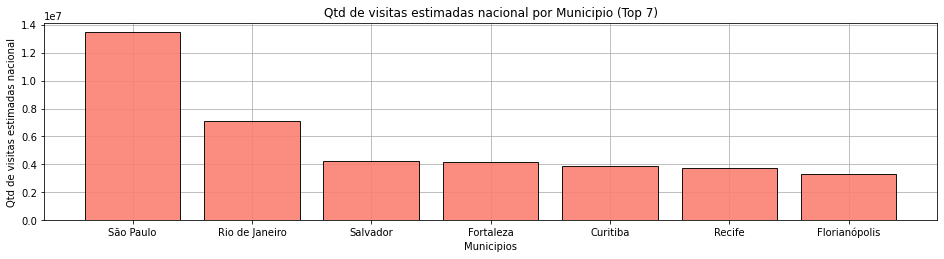

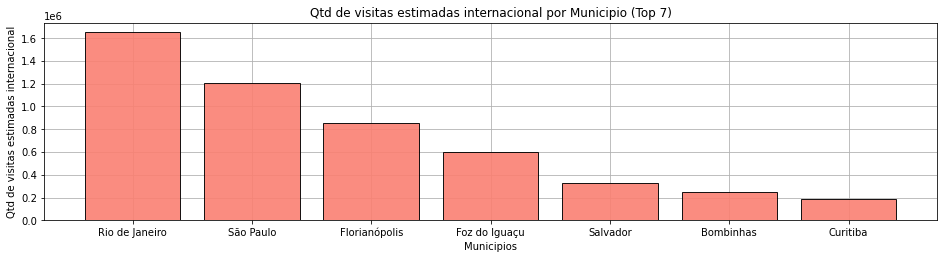

In [20]:
df_sorted_desc= df.sort_values('QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL',ascending=False)

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar('MUNICIPIO', 'QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL',data=df_sorted_desc.iloc[:7], edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Qtd de visitas estimadas nacional por Municipio (Top 7)")
plt.xlabel('Municipios')
plt.ylabel('Qtd de visitas estimadas nacional')
plt.show()

df_sorted_desc= df.sort_values('QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL',ascending=False)

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar('MUNICIPIO', 'QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL',data=df_sorted_desc.iloc[:7], edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Qtd de visitas estimadas internacional por Municipio (Top 7)")
plt.xlabel('Municipios')
plt.ylabel('Qtd de visitas estimadas internacional')
plt.show()

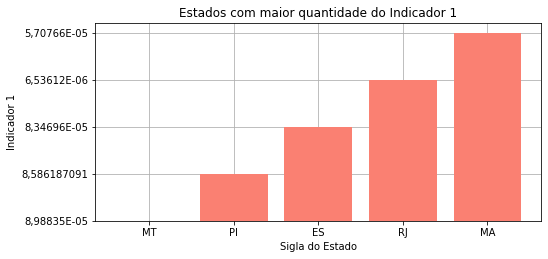

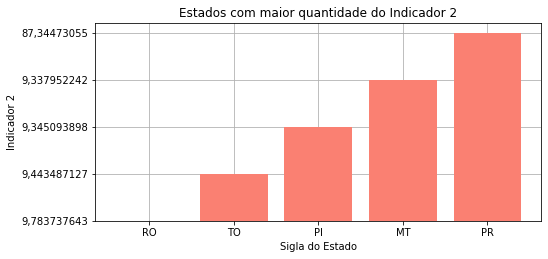

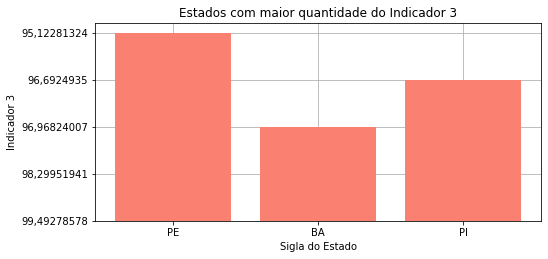

In [21]:
df_sorted_desc1= df.sort_values('Indicador_1',ascending=False)
df_sorted_desc2= df.sort_values('Indicador_2',ascending=False)
df_sorted_desc3= df.sort_values('Indicador_3',ascending=False)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2) 
plt.bar('UF', 'Indicador_1',data=df_sorted_desc1.iloc[:5], color = 'salmon', zorder = 3)
plt.grid(True, zorder = 0)
plt.title("Estados com maior quantidade do Indicador 1")
plt.xlabel('Sigla do Estado')
plt.ylabel('Indicador 1')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(2,1,2) 
plt.bar('UF', 'Indicador_2',data=df_sorted_desc2.iloc[:5], color = 'salmon', zorder = 3)
plt.grid(True, zorder = 0)
plt.title("Estados com maior quantidade do Indicador 2")
plt.xlabel('Sigla do Estado')
plt.ylabel('Indicador 2')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(2,1,2) 
plt.bar('UF', 'Indicador_3',data=df_sorted_desc3.iloc[:5], color = 'salmon', zorder = 3)
plt.grid(True, zorder = 0)
plt.title("Estados com maior quantidade do Indicador 3")
plt.xlabel('Sigla do Estado')
plt.ylabel('Indicador 3')
plt.show()

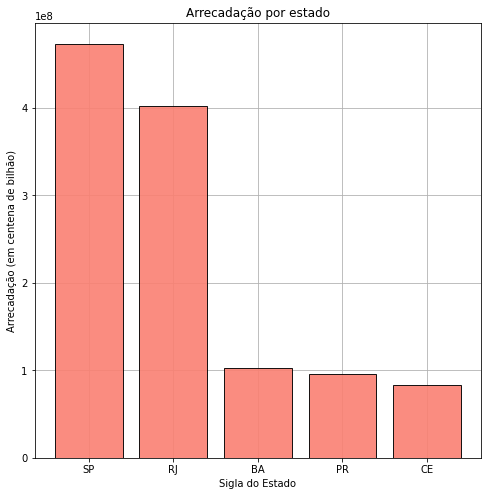

In [22]:
df_sorted_desc= df.sort_values('ARRECADACAO',ascending=False)

plt.figure(figsize=(8,8))
plt.bar('UF', 'ARRECADACAO',data=df_sorted_desc.iloc[:5], edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Arrecadação por estado")
plt.xlabel('Sigla do Estado')
plt.ylabel('Arrecadação (em centena de bilhão)')
plt.show()

# Iniciação da Modelagem e Tratamento dos dados


<br>

# <<< Lembrando que nossa Target é a Classificação da CAPAG >>>

<br>

## Tratando as valores NaN

In [23]:
df.dropna(axis = 0, inplace = True)
print(df.shape)
print(pd.isnull(df).sum())
df.head()

(2037, 21)
Instituição                                    0
Cod.IBGE                                       0
UF                                             0
População                                      0
Indicador_1                                    0
Nota_1                                         0
Indicador_2                                    0
Nota_2                                         0
Indicador_3                                    0
Nota_3                                         0
Classificação da CAPAG                         0
MUNICIPIO                                      0
MACRO                                          0
REGIAO_TURISTICA                               0
COD_IBGE                                       0
QUANTIDADE_EMPREGOS                            0
QUANTIDADE_ ESTABELECIMENTOS                   0
QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL    0
QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL         0
ARRECADACAO                                    0
CLUSTER  

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,...,MUNICIPIO,MACRO,REGIAO_TURISTICA,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,19614.0,"0,154622885",A,"0,959243401",C,"1,832419324",C,...,Abadiânia,Centro-Oeste,Região Turística do Ouro e Cristais,5200100.0,157.0,31.0,6752.0,89930.0,741632.0,B
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23223.0,"0,310158289",A,"0,901489297",B,"0,13432183",A,...,Abaeté,Sudeste,Lago de Três Marias,3100203.0,16.0,3.0,245.0,8415.0,0.0,D
7,Prefeitura Municipal de Abdon Batista - SC,4200051,SC,2577.0,"0,039165365",A,"0,831326184",A,"0,161233074",A,...,Abdon Batista,Sul,Vale dos Imigrantes,4200051.0,0.0,0.0,0.0,0.0,0.0,E
8,Prefeitura Municipal de Abelardo Luz - SC,4200101,SC,17847.0,"0,057427262",A,"0,893905927",A,"0,128920166",A,...,Abelardo Luz,Sul,Grande Oeste,4200101.0,14.0,4.0,0.0,10515.0,0.0,D
9,Prefeitura Municipal de Abre Campo - MG,3100302,MG,13465.0,"0,644296656",B,"0,926109792",B,"0,013112701",A,...,Abre Campo,Sudeste,Montanhas e Fé,3100302.0,16.0,3.0,0.0,14987.0,0.0,D


In [24]:
# Verificando Clusteres CAPAG
print(df['Classificação da CAPAG'].value_counts())
df = df[df['Classificação da CAPAG'] != 'D'] # Removendo o Cluster D do DataFrame

C    1131
B     465
A     440
D       1
Name: Classificação da CAPAG, dtype: int64


## Tratando as variáveis categóricas/strings

In [25]:
df_tratado = pd.get_dummies(df.drop('Classificação da CAPAG', axis = 1))
le = preprocessing.LabelEncoder()
df_tratado['Classificação da CAPAG'] = le.fit_transform(df['Classificação da CAPAG'])

df_tratado.head()

,Cod.IBGE,População,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,Instituição_Prefeitura Municipal de Abadiânia - GO,Instituição_Prefeitura Municipal de Abaeté - MG,...,REGIAO_TURISTICA_Águas do Oeste,REGIAO_TURISTICA_Águas e Flores Paulista,REGIAO_TURISTICA_Águas e Florestas da Linha do Equador,"REGIAO_TURISTICA_Águas, Sabores e Saberes",CLUSTER_A,CLUSTER_B,CLUSTER_C,CLUSTER_D,CLUSTER_E,Classificação da CAPAG
2,5200100,19614.0,5200100.0,157.0,31.0,6752.0,89930.0,741632.0,1,0,...,0,0,0,0,0,1,0,0,0,2
3,3100203,23223.0,3100203.0,16.0,3.0,245.0,8415.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,4200051,2577.0,4200051.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,4200101,17847.0,4200101.0,14.0,4.0,0.0,10515.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,3100302,13465.0,3100302.0,16.0,3.0,0.0,14987.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Separando as amostras em treino e teste

In [26]:
# selecionando apenas variáveis independentes
X = df_tratado.drop('Classificação da CAPAG', axis=1)
# selecionando apenas a variável dependente(target)
y = df_tratado['Classificação da CAPAG']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)# serve para tornar o processo em algo reprodutivo

# vendo o shape de cada um dos x(linhas e colunas)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1425, 10510), (611, 10510), (1425,), (611,))

## Modelo 1- Logistic Regressor

In [27]:
lg = LogisticRegression(random_state=1)

In [28]:
lg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [29]:
y_lg = lg.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_lg))
print(classification_report(y_test,y_lg))

[[  0   0 127]
 [  0   3 139]
 [  0   5 337]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.38      0.02      0.04       142
           2       0.56      0.99      0.71       342

    accuracy                           0.56       611
   macro avg       0.31      0.34      0.25       611
weighted avg       0.40      0.56      0.41       611



## Modelo 2- KNN Classifier

In [31]:
kn = KNeighborsClassifier()

In [32]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_kn = kn.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_kn))
print(classification_report(y_test,y_kn))

[[ 59  21  47]
 [ 36  25  81]
 [ 67  53 222]]
              precision    recall  f1-score   support

           0       0.36      0.46      0.41       127
           1       0.25      0.18      0.21       142
           2       0.63      0.65      0.64       342

    accuracy                           0.50       611
   macro avg       0.42      0.43      0.42       611
weighted avg       0.49      0.50      0.49       611



## Modelo 3- Random Forest Classifier

In [35]:
rf = RandomForestClassifier(random_state=1)

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [37]:
y_rf = rf.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test,y_rf))

[[123   0   4]
 [  1 140   1]
 [  0   0 342]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       127
           1       1.00      0.99      0.99       142
           2       0.99      1.00      0.99       342

    accuracy                           0.99       611
   macro avg       0.99      0.98      0.99       611
weighted avg       0.99      0.99      0.99       611



### Teste 2 - Modelo Random Forest Classifier
### Tentando fugir de um possivel overfiting, usamos o metodo do PCA para o mesmo modelo

In [39]:
# X_train
pca = PCA(n_components=611)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

# X_test
pca = PCA(n_components=611)
principalComponents_teste = pca.fit_transform(X_test)
principalDf_test = pd.DataFrame(data = principalComponents_teste)

In [40]:
rf = RandomForestClassifier(random_state=1)

In [41]:
rf.fit(principalDf,y_train)

RandomForestClassifier(random_state=1)

In [42]:
y_rf = rf.predict(principalDf_test)

In [43]:
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test,y_rf))

[[ 26   0 101]
 [  7  54  81]
 [ 12   4 326]]
              precision    recall  f1-score   support

           0       0.58      0.20      0.30       127
           1       0.93      0.38      0.54       142
           2       0.64      0.95      0.77       342

    accuracy                           0.66       611
   macro avg       0.72      0.51      0.54       611
weighted avg       0.70      0.66      0.62       611



## Modelo 4- XGBoost Classifier

In [44]:
# X_train
pca = PCA(n_components=611)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

# X_test
pca = PCA(n_components=611)
principalComponents_teste = pca.fit_transform(X_test)
principalDf_test = pd.DataFrame(data = principalComponents_teste)

In [45]:
xg = XGBClassifier()

In [46]:
xg.fit(principalDf, y_train)

[16:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_xg = xg.predict(principalDf_test)

In [48]:
print(confusion_matrix(y_test, y_xg))
print(classification_report(y_test,y_xg))

[[ 71   0  56]
 [  1 135   6]
 [ 19  23 300]]
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       127
           1       0.85      0.95      0.90       142
           2       0.83      0.88      0.85       342

    accuracy                           0.83       611
   macro avg       0.82      0.80      0.80       611
weighted avg       0.82      0.83      0.82       611

